In [8]:
import numpy as np


In [9]:
from sklearn.datasets import make_classification
n_samples = 100
n_outliers = 10
X, Y= make_classification(n_samples=n_samples,n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state =42)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.07, random_state=42)

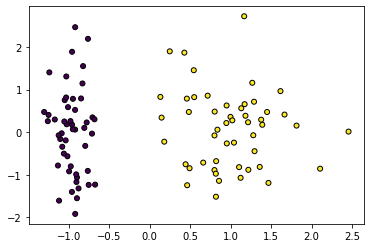

In [11]:

import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
            s=25, edgecolor='k')

In [20]:
first_class = []
zero_class = []
for index in range(len(Y)):
    if Y[index]==1:
        first_class.append(X[index])
    if Y[index]==0:
        zero_class.append(X[index])
        
        
first_class = np.array(first_class)

zero_class = np.array(zero_class)
print(zero_class.shape, first_class.shape)

(50, 2) (50, 2)


In [21]:
phi  = first_class.shape[0]/X.shape[0]
phi

0.5

In [22]:
mu0 = zero_class.mean(axis=0)/len(Y)
mu1 = first_class.mean(axis=0)/len(Y)
print(mu0, mu1)

[-9.62756673e-03  9.37157582e-05] [0.00990118 0.00090329]


In [23]:
# np.sum((zero_class - mu0).dot((zero_class - mu0).T), axis = 1)

In [24]:
a = ((zero_class - mu0).T).dot((zero_class - mu0))
a

array([[46.58818446, -0.9925452 ],
       [-0.9925452 , 48.60181726]])

In [25]:
b = ((first_class - mu1).T).dot((first_class - mu1))

In [26]:
cov = (a+b)/len(Y)

In [27]:
def normal_dist_gda(x , mean, cov):

    dim = np.shape(cov)[0]
    covdet = np.linalg.det(cov + np.eye(dim) * 0.001)
    
    part1 = 1/(((2*np.pi)**(dim/2))*(np.abs(covdet)**0.5))

    
    part2 = np.exp(-0.5 *((x-mean)).dot(np.linalg.inv(cov)).dot((x-mean).T))
    
    prob_density = part1*part2   
    
    return prob_density  


In [28]:
x0_gda = normal_dist_gda(zero_class, mu0, cov)
x0_gda.shape

(50, 50)

In [29]:
# x0_gda

In [30]:
x1_gda = normal_dist_gda(first_class, mu1, cov)

In [31]:
theta0 = (mu0-mu1)/cov
theta0

array([[-1.83886530e-02, -7.80042817e-02],
       [-1.88162963e+00, -9.16405153e-04]])

In [32]:
theta1 = ((1-phi)/phi)* ((mu0**2+mu1**2)/2*cov)
theta1

array([[1.01274063e-04, 4.27974310e-09],
       [9.89723785e-07, 3.64291149e-07]])

In [33]:
theta = np.concatenate((theta0, theta1), axis=0)

In [34]:
def predict(X, theta):
    return np.dot(X, theta)

In [35]:
X_I = np.c_[np.ones_like(X), X]
# X_I

In [36]:
pred = predict(X_I, theta)

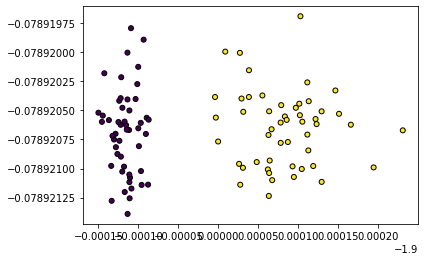

In [37]:
plt.scatter(pred[:, 0], pred[:, 1], marker='o', c=Y,
            s=25, edgecolor='k')


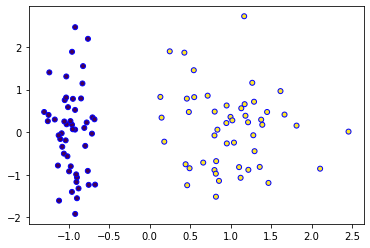

In [38]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
            s=25, edgecolor='b')

In [39]:
# pred

In [40]:
phi0 = phi
phi1 = 1 - phi

In [41]:
input_x = np.array([[1,0], [4,1], [-7,9]])
def predict_class_for_list(input_x):
    result = []
    for i in input_x:
        if normal_dist_gda(i, mu0, cov)*phi0>normal_dist_gda(i, mu1, cov)*phi1:
            result.append(0)
        else:
            result.append(1)
    return result

In [44]:
predict_class_for_list(X_test)

[0, 0, 0, 1, 1, 0, 0, 1]

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(X, Y)
LinearDiscriminantAnalysis()
# print(clf.predict(X))
print(clf.predict(X_test))

[0 0 0 1 1 0 0 1]


In [47]:
def train(X, Y):
    first_class = []
    zero_class = []
    for index in range(len(Y)):
        if Y[index]==1:
            first_class.append(X[index])
        if Y[index]==0:
            zero_class.append(X[index])


    first_class = np.array(first_class)
    zero_class = np.array(zero_class)
    phi0  = zero_class.shape[0]/X.shape[0]
    phi1  = 1 - phi0
    
    mu0 = zero_class.mean(axis=0)/len(Y)
    mu1 = first_class.mean(axis=0)/len(Y)
    
    cov = (((zero_class - mu0).T).dot((zero_class - mu0))+((first_class - mu1).T).dot((first_class - mu1)))/len(Y)
    
    p0 = normal_dist_gda(zero_class, mu0, cov)
    p1 = normal_dist_gda(first_class, mu1, cov)
    
#     theta0 = (mu0-mu1)/cov
#     theta1 = ((1-phi)/phi)* ((mu0**2+mu1**2)/2*cov)
#     theta = np.concatenate((theta0, theta1), axis=0)
    
#     X_I = np.c_[np.ones_like(X), X]
#     pred = predict(X_I, theta)
    
    
    return mu0, mu1,cov, phi1, phi0

In [49]:
mu0, mu1,cov, phi0, phi1 = train(X_train, y_train)
phi0

0.5108695652173914

In [50]:
def predict_class(input_x, mu0, mu1,cov, phi0, phi1):

    result = []
    for i in input_x:
        if normal_dist_gda(i, mu0, cov)*phi0>normal_dist_gda(i, mu1, cov)*phi1:
            result.append(0)
        else:
            result.append(1)
    return result

In [51]:
predict_class(X_test, mu0, mu1,cov, phi0, phi1)

[0, 0, 0, 0, 0, 0, 0, 0]

In [153]:
clf.fit(X_train, y_train)
print(clf.predict(X_test))
print(clf.score(X_test, y_test))

[0 0 0 1 1 0 0 1]
1.0


In [154]:
mu0, mu1,cov, phi0, phi1 = train(X_train, y_train)
predict_class(X_test, mu0, mu1,cov, phi0, phi1)

[0, 0, 0, 0, 0, 0, 0, 0]